## Descripcion:
Hemos escogido el dataset statlog_german_credit_data de fetch_ucirepo.  
Este dataset consiste de 20 variables mixtas numericas y categóricas.  
El problema es de clasificación binaria en el que se tiene que intentar predecir si hay que ceder el crédito o no segun las diferentes carácterísticas del prestario.


In [1]:
pip install ucimlrepo


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# metadata
print(statlog_german_credit_data.metadata)

# variable information
print(statlog_german_credit_data.variables)

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

Cambiando los nombres a las variables y a los posibles valores de las variables categóricas para la visualización

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset
from ucimlrepo import fetch_ucirepo
statlog_german_credit_data = fetch_ucirepo(id=144)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Combinar características y objetivo en un solo DataFrame
df = pd.concat([X, y], axis=1)

# Obtener el DataFrame de variables
variables_df = statlog_german_credit_data.variables

# Filtrar variables_df para excluir 'class'
variables_to_rename = variables_df[variables_df['name'] != 'class']

# Reemplazar espacios por guiones bajos en las descripciones
variables_to_rename['description_underscore'] = variables_to_rename['description'].str.replace(' ', '_')

# Crear un diccionario que mapee 'name' a 'description_underscore', excluyendo 'class'
name_to_description = dict(zip(variables_to_rename['name'], variables_to_rename['description_underscore']))

# Renombrar las columnas del DataFrame, excluyendo 'class'
df = df.rename(columns=name_to_description)

# Ahora puedes utilizar las listas de variables actualizadas
numerical_cols_original = ['Attribute2', 'Attribute5', 'Attribute8', 'Attribute11', 'Attribute13', 'Attribute16', 'Attribute18']
categorical_cols_original = ['Attribute1', 'Attribute3', 'Attribute4', 'Attribute6', 'Attribute7', 'Attribute9', 'Attribute10',
                             'Attribute12', 'Attribute14', 'Attribute15', 'Attribute17', 'Attribute19', 'Attribute20']

# Actualizar las listas con los nuevos nombres
numerical_cols = [name_to_description.get(col, col) for col in numerical_cols_original]
categorical_cols = [name_to_description.get(col, col) for col in categorical_cols_original]

mapping_attribute1 = {
    'A11': '... < 0 DM',
    'A12': '0 <= ... < 200 DM',
    'A13': '... >= 200 DM',
    'A14': 'no checking account'
}
mapping_attribute3 = {
    'A30': 'no credits taken/ all credits paid back duly',
    'A31': 'all credits at this bank paid back duly',
    'A32': 'existing credits paid back duly till now',
    'A33': 'delay in paying off in the past',
    'A34': 'critical account/ other credits existing (not at this bank)'
}
mapping_attribute4 = {
    'A40': 'car (new)',
    'A41': 'car (used)',
    'A42': 'furniture/equipment',
    'A43': 'radio/television',
    'A44': 'domestic appliances',
    'A45': 'repairs',
    'A46': 'education',
    'A48': 'retraining',
    'A49': 'business',
    'A410': 'others'
}
mapping_attribute6 = {
    'A61': '... < 100 DM',
    'A62': '100 <= ... < 500 DM',
    'A63': '500 <= ... < 1000 DM',
    'A64': '... >= 1000 DM',
    'A65': 'unknown/ no savings account'
}
mapping_attribute7 = {
    'A71': 'unemployed',
    'A72': '... < 1 year',
    'A73': '1 <= ... < 4 years',
    'A74': '4 <= ... < 7 years',
    'A75': '... >= 7 years'
}
mapping_attribute9 = {
    'A91': 'male: divorced/separated',
    'A92': 'female: divorced/separated/married',
    'A93': 'male: single',
    'A94': 'male: married/widowed',
    'A95': 'female: single'
}
mapping_attribute10 = {
    'A101': 'none',
    'A102': 'co-applicant',
    'A103': 'guarantor'
}
mapping_attribute12 = {
    'A121': 'real estate',
    'A122': 'building society savings/life insurance',
    'A123': 'car or other',
    'A124': 'unknown / no property'
}
mapping_attribute14 = {
    'A141': 'bank',
    'A142': 'stores',
    'A143': 'none'
}
mapping_attribute15 = {
    'A151': 'rent',
    'A152': 'own',
    'A153': 'for free'
}
mapping_attribute17 = {
    'A171': 'unemployed/ unskilled - non-resident',
    'A172': 'unskilled - resident',
    'A173': 'skilled employee / official',
    'A174': 'management/ self-employed/ highly qualified'
}
mapping_attribute19 = {
    'A191': 'none',
    'A192': 'yes, registered under the customer\'s name'
}
mapping_attribute20 = {
    'A201': 'yes',
    'A202': 'no'
}
# Aplicar los mapeos al DataFrame
df['Status_of_existing_checking_account'] = df['Status_of_existing_checking_account'].map(mapping_attribute1)
df['Credit_history'] = df['Credit_history'].map(mapping_attribute3)
df['Purpose'] = df['Purpose'].map(mapping_attribute4)
df['Savings_account/bonds'] = df['Savings_account/bonds'].map(mapping_attribute6)
df['Present_employment_since'] = df['Present_employment_since'].map(mapping_attribute7)
df['Personal_status_and_sex'] = df['Personal_status_and_sex'].map(mapping_attribute9)
df['Other_debtors_/_guarantors'] = df['Other_debtors_/_guarantors'].map(mapping_attribute10)
df['Property'] = df['Property'].map(mapping_attribute12)
df['Other_installment_plans'] = df['Other_installment_plans'].map(mapping_attribute14)
df['Housing'] = df['Housing'].map(mapping_attribute15)
df['Job'] = df['Job'].map(mapping_attribute17)
df['Telephone'] = df['Telephone'].map(mapping_attribute19)
df['foreign_worker'] = df['foreign_worker'].map(mapping_attribute20)



<ipython-input-3-1a830a50e53f>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  variables_to_rename['description_underscore'] = variables_to_rename['description'].str.replace(' ', '_')


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_numerical(df, numerical_cols=None):
    """
    Visualiza variables numéricas mediante histogramas y diagramas de caja.

    Parámetros:
    - df: DataFrame de pandas que contiene los datos.
    - numerical_cols: Lista de nombres de columnas numéricas. Si es None, se detectan automáticamente.
    """
    if numerical_cols is None:
        numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    for col in numerical_cols:
        plt.figure(figsize=(8, 4))

        # Histograma
        plt.subplot(1, 2, 1)
        sns.histplot(df[col], kde=True, color='skyblue')
        plt.title(f'Histograma de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')

        # Diagrama de caja
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Diagrama de caja de {col}')
        plt.xlabel(col)

        plt.tight_layout()
        plt.show()

def visualize_categorical(df, categorical_cols):
    """
    Visualiza variables categóricas mediante gráficos de barras.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        order = df[col].value_counts().index  # Ordenar por frecuencia

        # Obtener una paleta de colores con tantos colores como categorías
        palette = sns.color_palette('viridis', n_colors=len(order))

        # Crear el gráfico sin especificar 'palette' ni 'hue'
        ax = sns.countplot(x=col, data=df, order=order)

        # Asignar los colores manualmente a cada barra
        for i, patch in enumerate(ax.patches):
            patch.set_facecolor(palette[i % len(palette)])

        plt.title(f'Conteo de {col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()



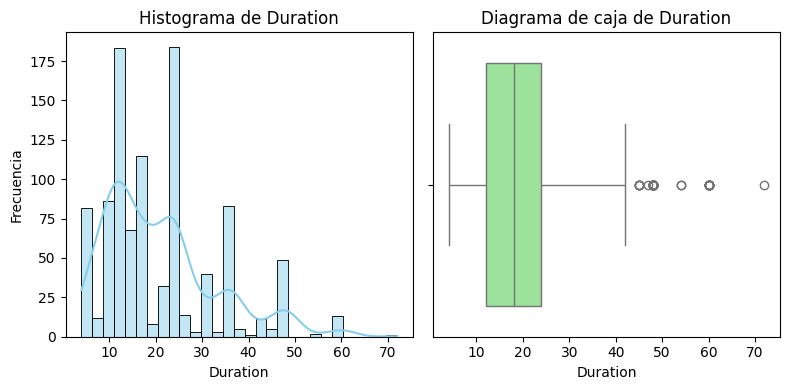

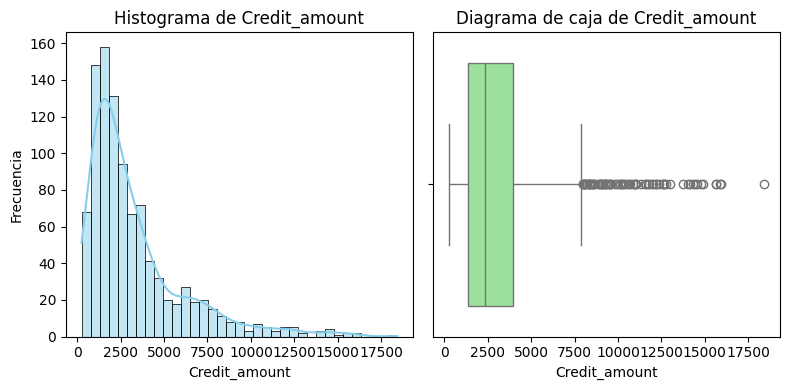

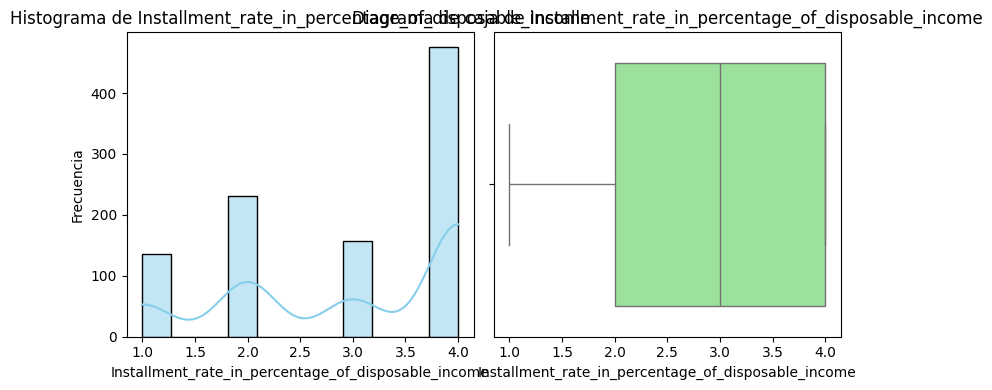

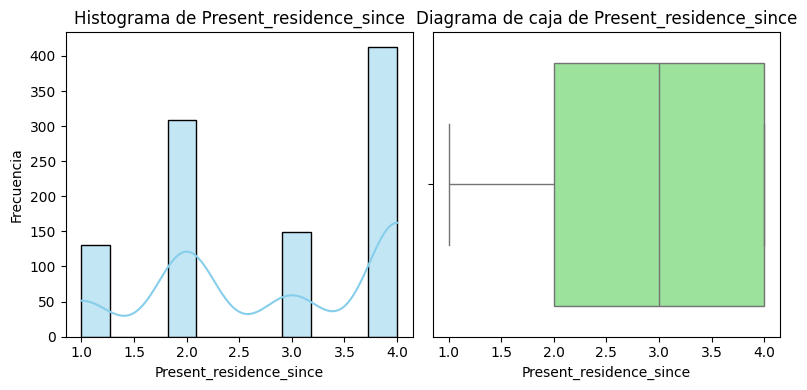

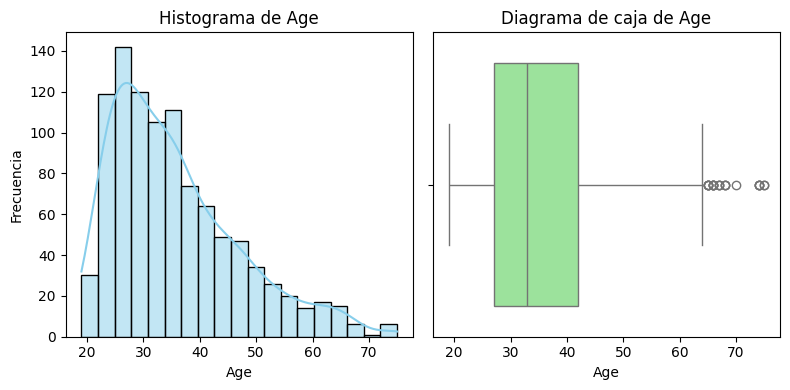

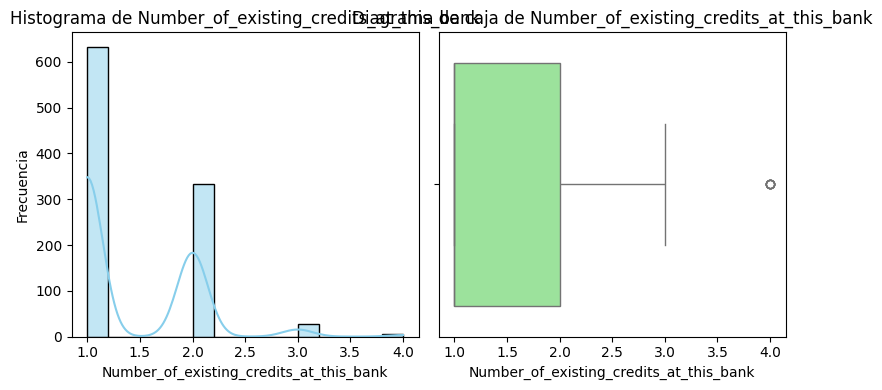

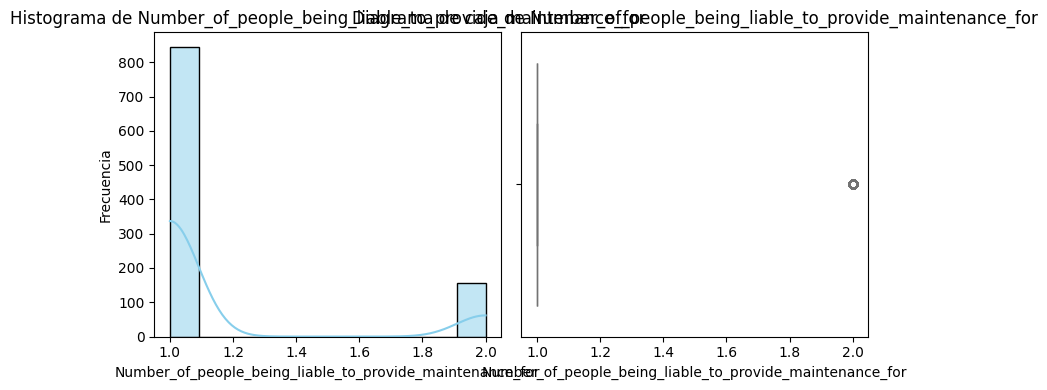

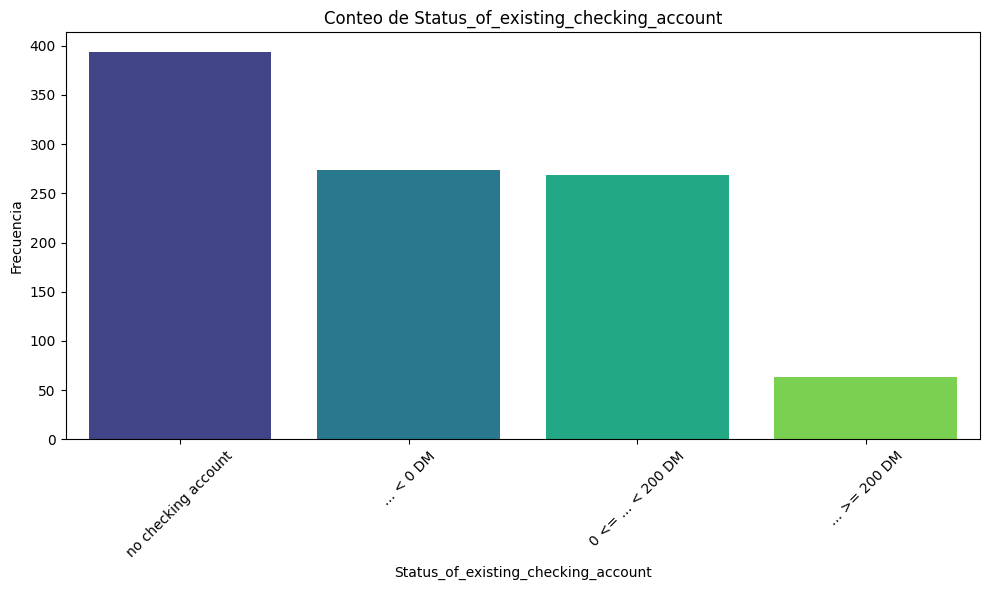

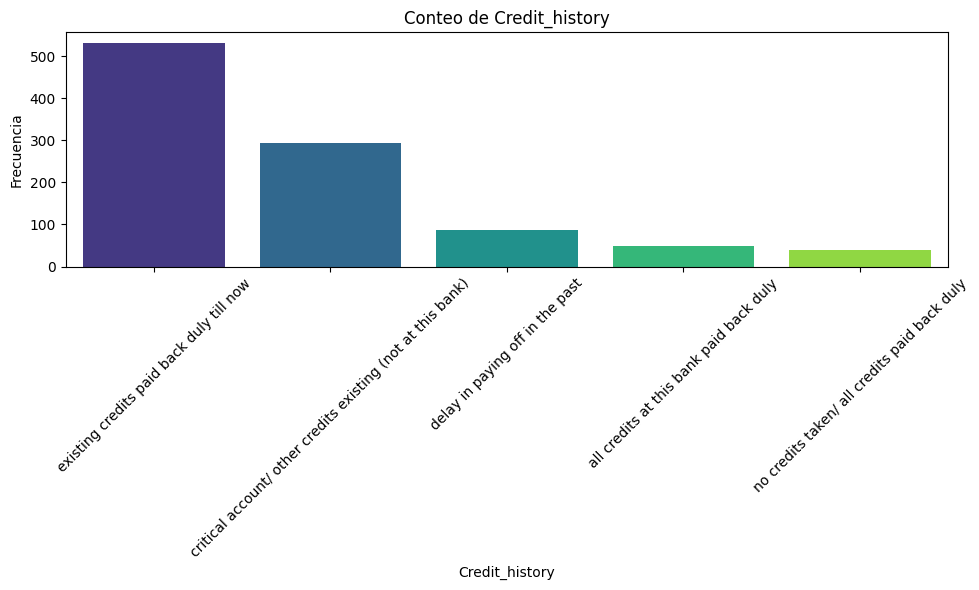

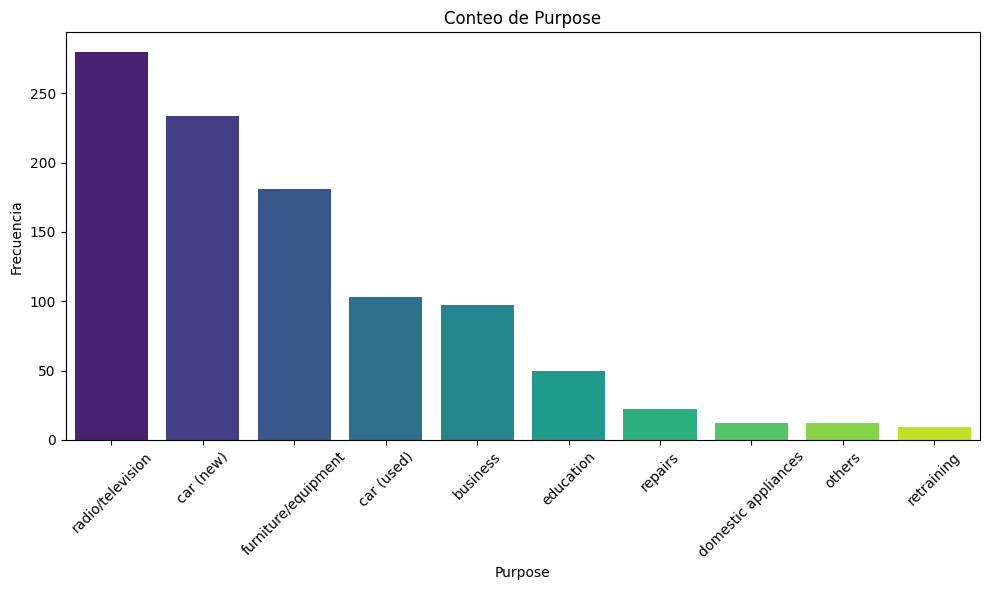

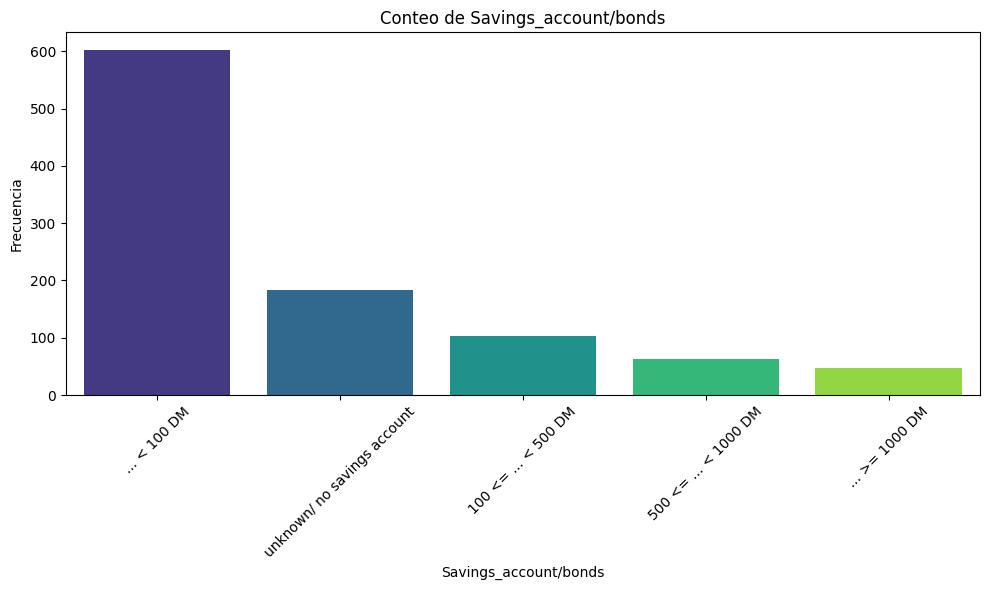

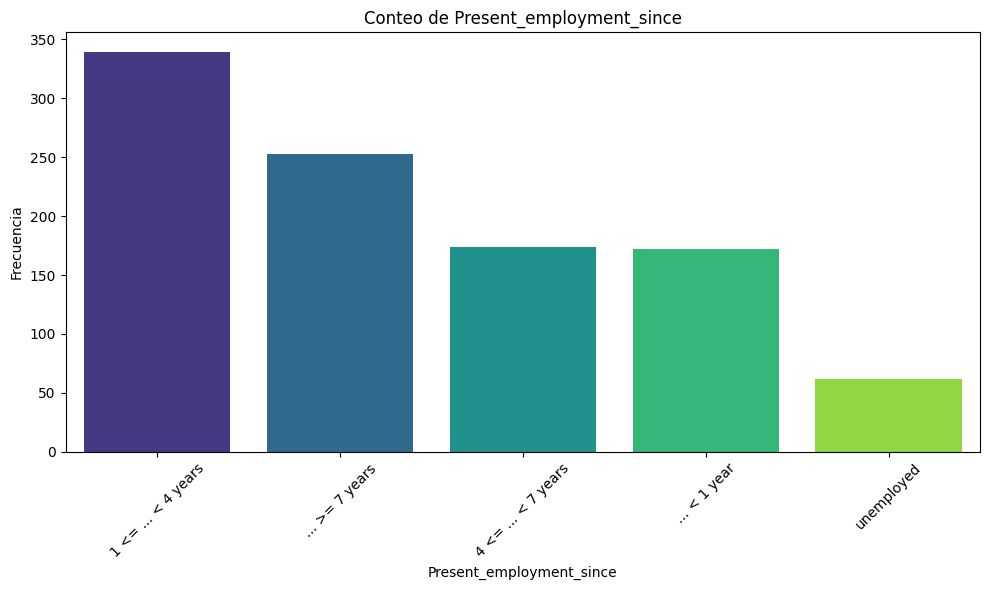

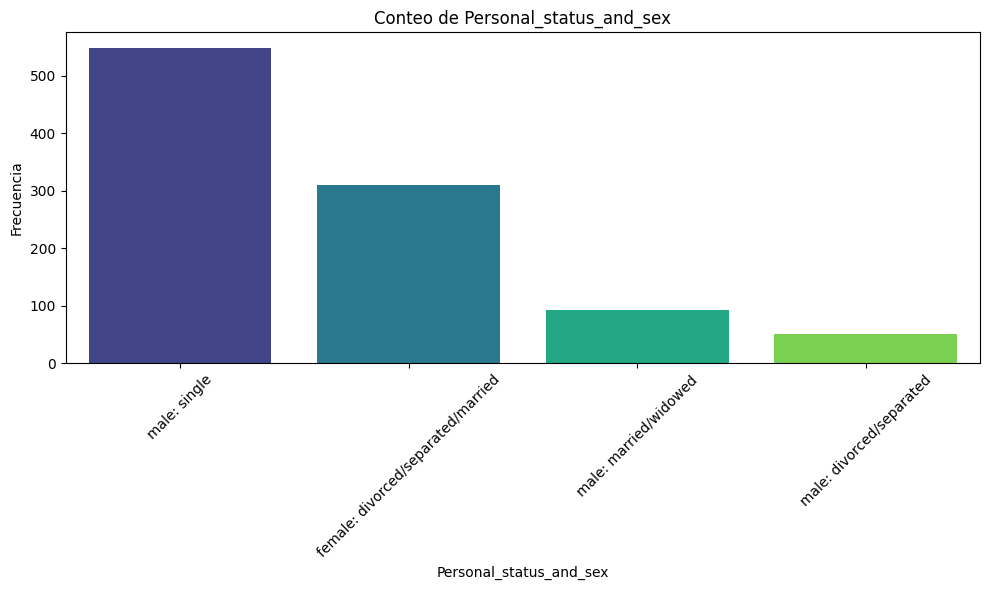

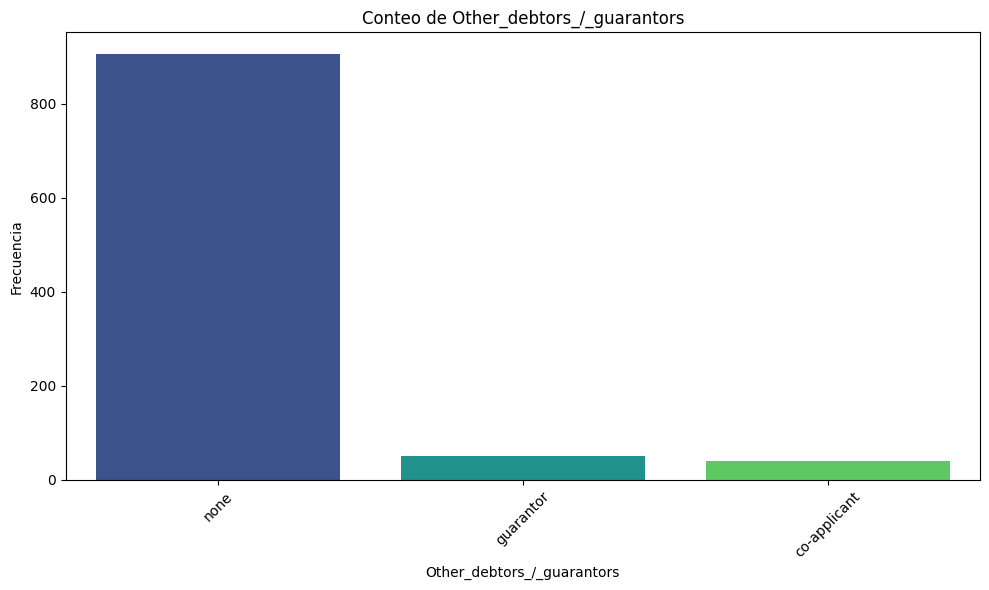

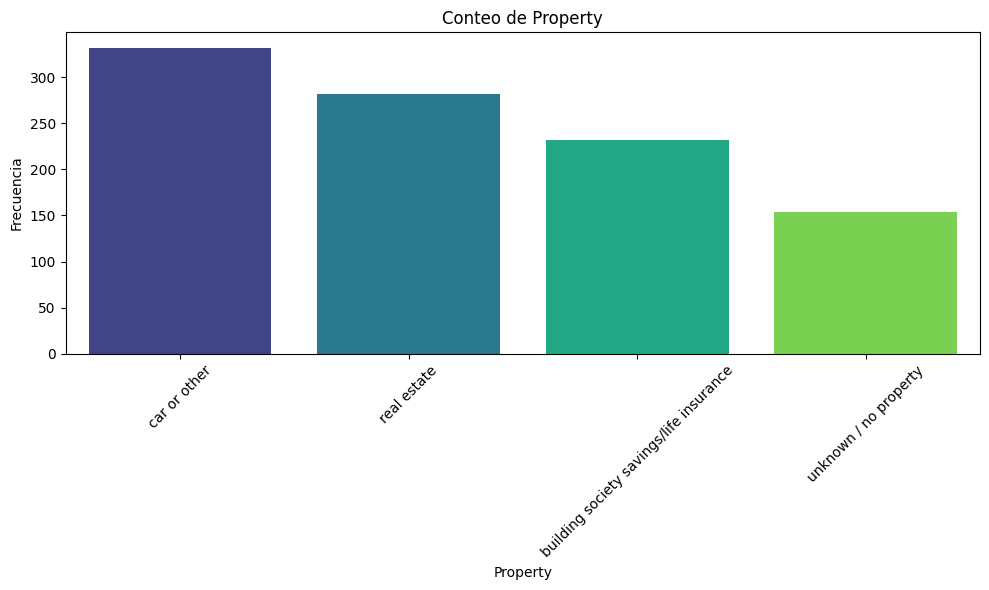

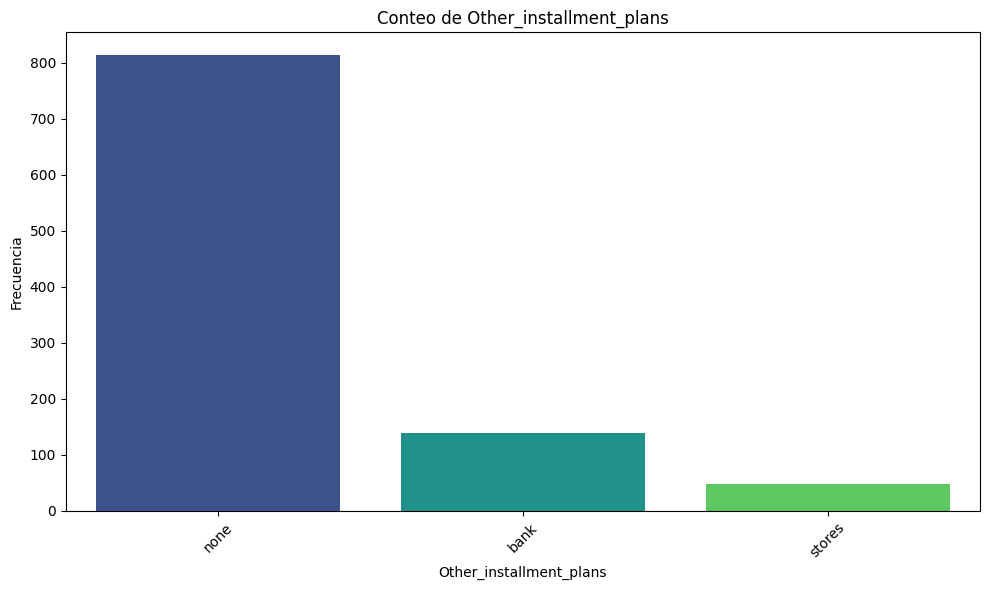

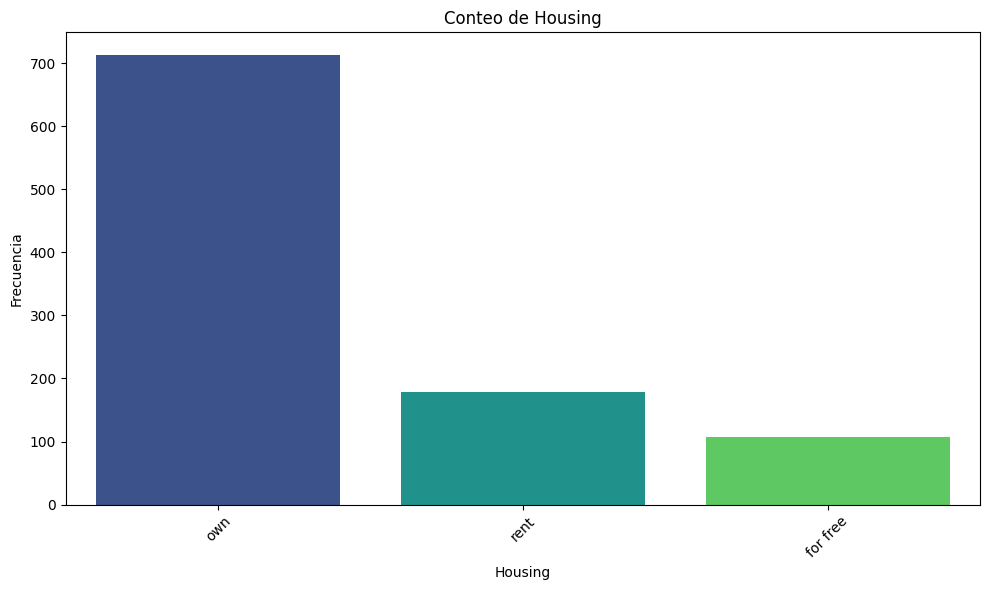

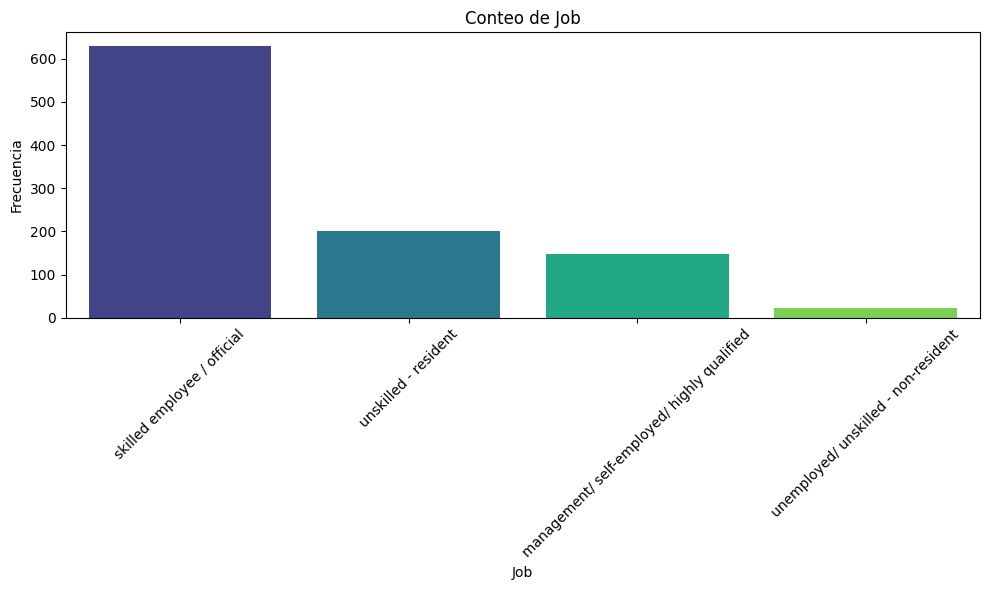

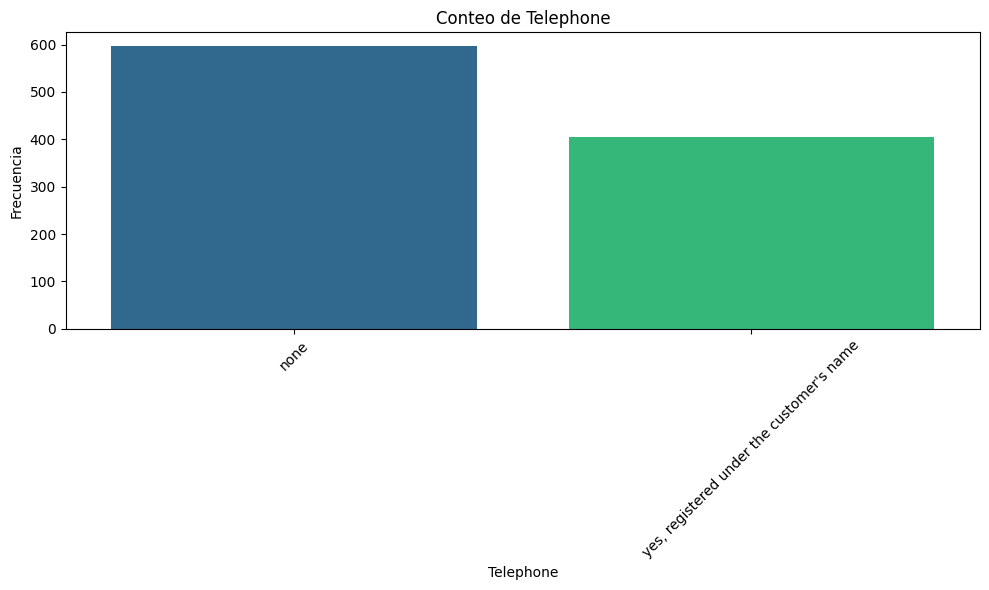

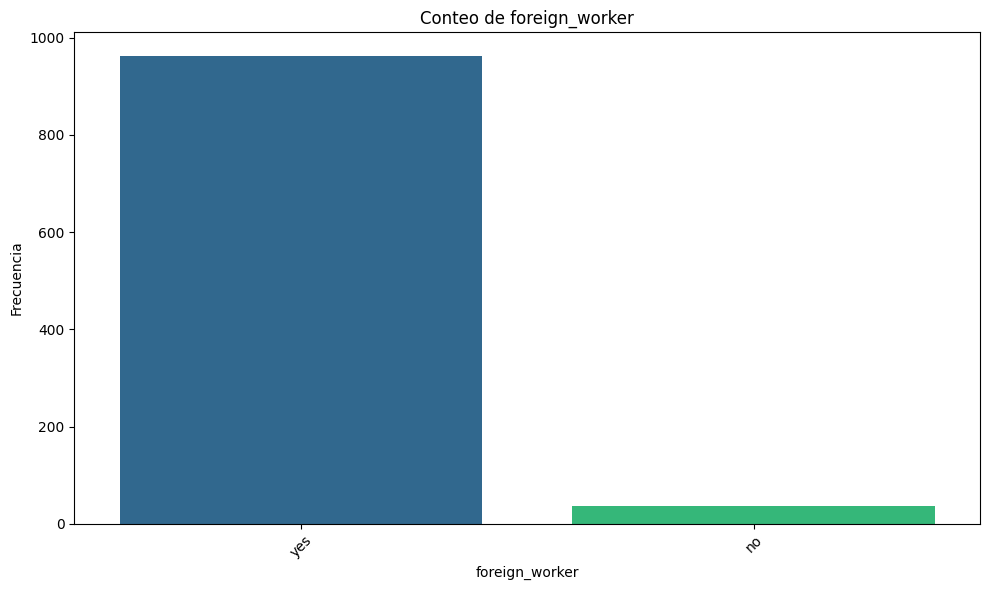

In [5]:
visualize_numerical(df, numerical_cols)
visualize_categorical(df, categorical_cols)


Al analizar la visualización de las variables numéricas, podemos confirmar que no se encuentran valores perdidos en el conjunto de datos, lo cual facilita el análisis y garantiza que todas las observaciones están completas. Asimismo, en los diagramas de caja no se observan valores atípicos o outliers significativos, lo cual sugiere que las características numéricas se distribuyen de manera consistente sin presencia de puntos extremos que puedan distorsionar el análisis.

Al examinar los histogramas de algunas variables, observamos que no siguen una distribución normal, lo cual es esperado dada la naturaleza de estas características. Por ejemplo, variables como el número de créditos existentes en el banco no presentan una curva simétrica, ya que se espera que esta variable esté concentrada en ciertos valores debido a las prácticas de crédito estándar. Esta falta de normalidad es común en datos financieros y no representa necesariamente un problema para el análisis.

En la visualización de las variables categóricas, observamos una distribución balanceada y desequilibrada en diferentes variables, que refleja la diversidad y características de los solicitantes de crédito. Mediante un tratamiento adecuado del desequilibrio en algunas categorías, podemos mejorar la capacidad del modelo para capturar patrones significativos y asegurar que aprenda de manera equilibrada y representativa de todo el conjunto de datos.

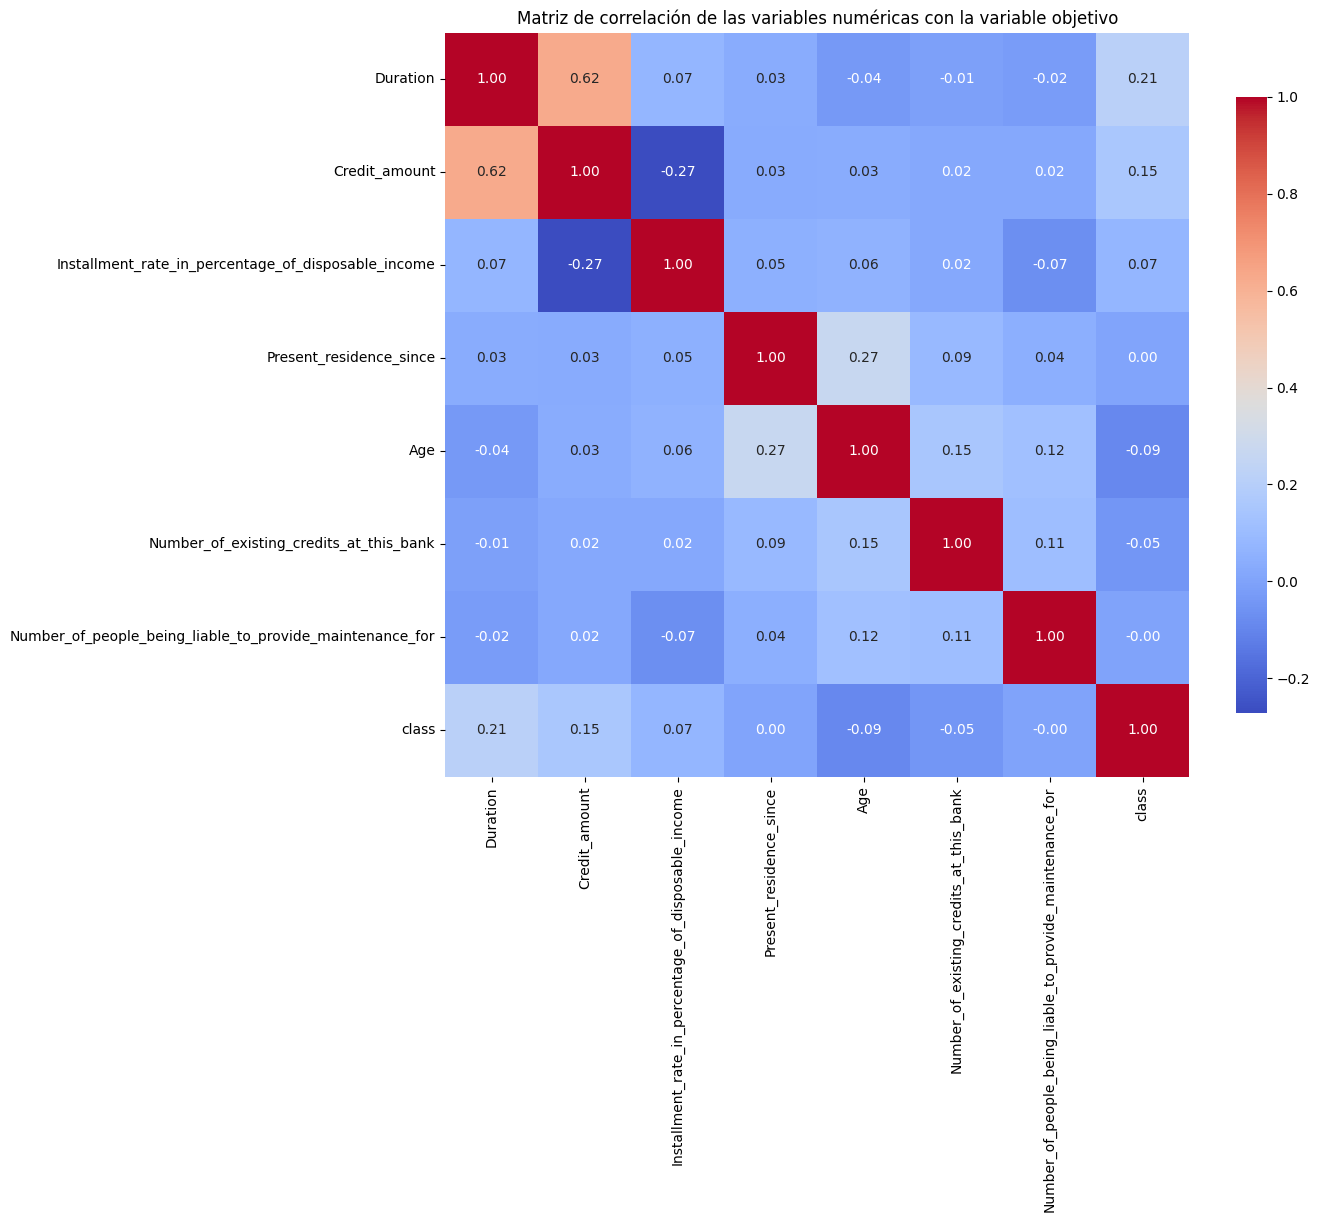

In [6]:

numerical_cols_with_target = numerical_cols + ['class']


corr_matrix_with_target = df[numerical_cols_with_target].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_with_target, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de correlación de las variables numéricas con la variable objetivo')
plt.show()


Al observar la matriz de correlación de las variables numéricas, notamos que la mayoría de los coeficientes de correlación se encuentran muy cerca de 0. Esto sugiere que, en general, las variables numéricas del conjunto de datos no presentan relaciones lineales fuertes entre sí. Este bajo grado de correlación implica que cada variable aporta información relativamente independiente, lo cual puede ser beneficioso para el modelo, ya que no se corre el riesgo de redundancia o multicolinealidad significativa entre las variables numéricas.

Sin embargo, hay una excepción: encontramos una correlación de aproximadamente 0.62 entre las variables Duration y Credit Amount. Una correlación positiva en este caso tendría sentido: a medida que aumenta la cantidad solicitada, es probable que también se extienda la duración del préstamo para permitir pagos más asequibles.

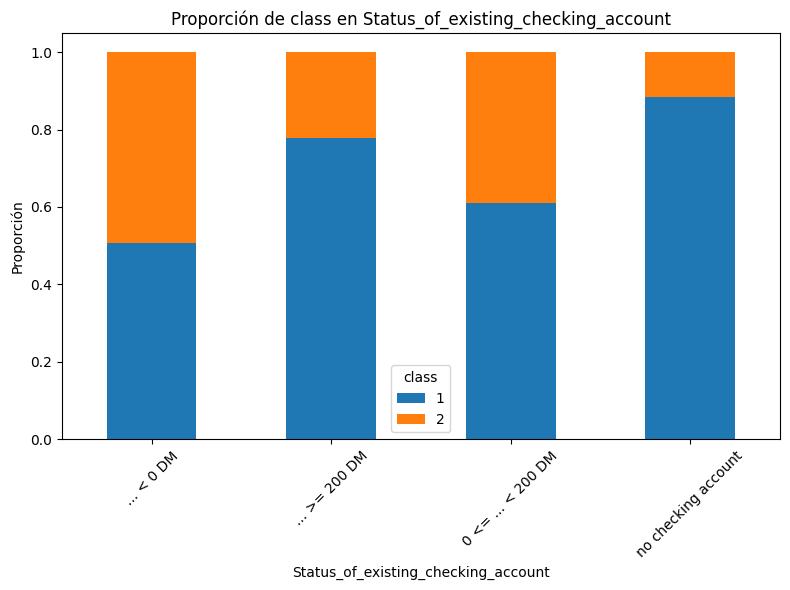

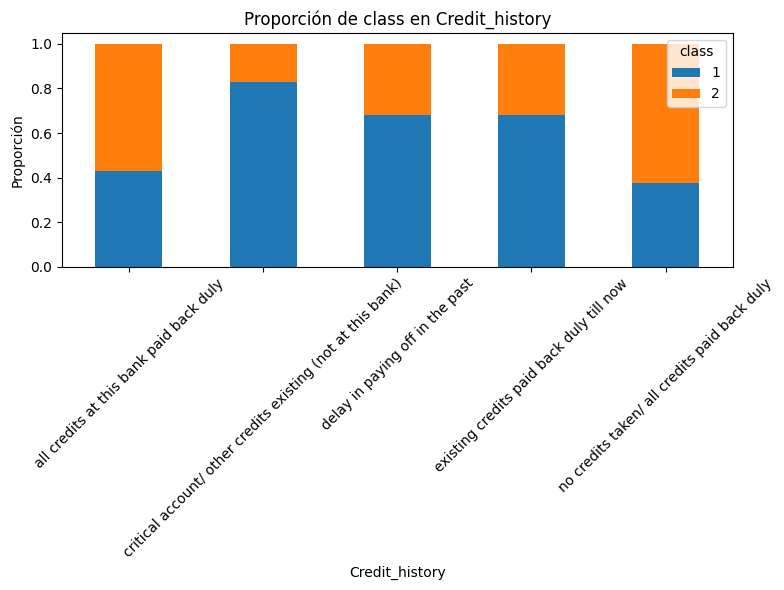

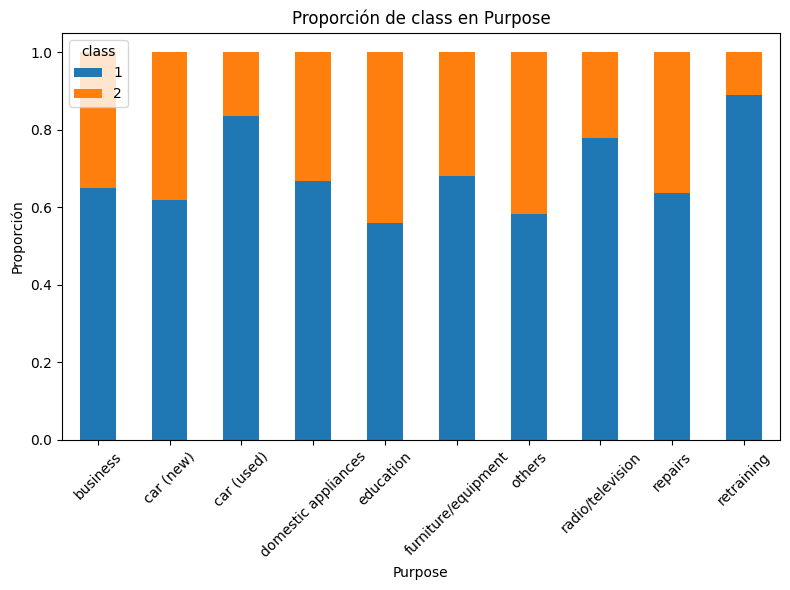

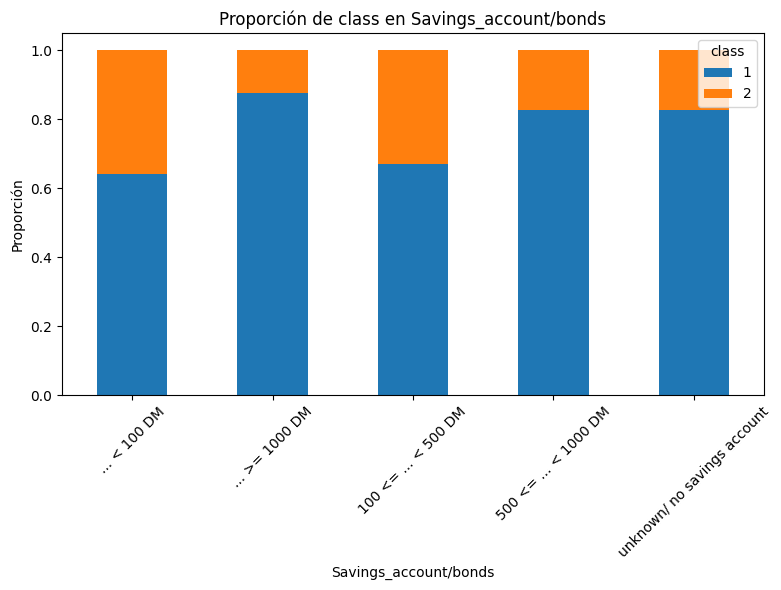

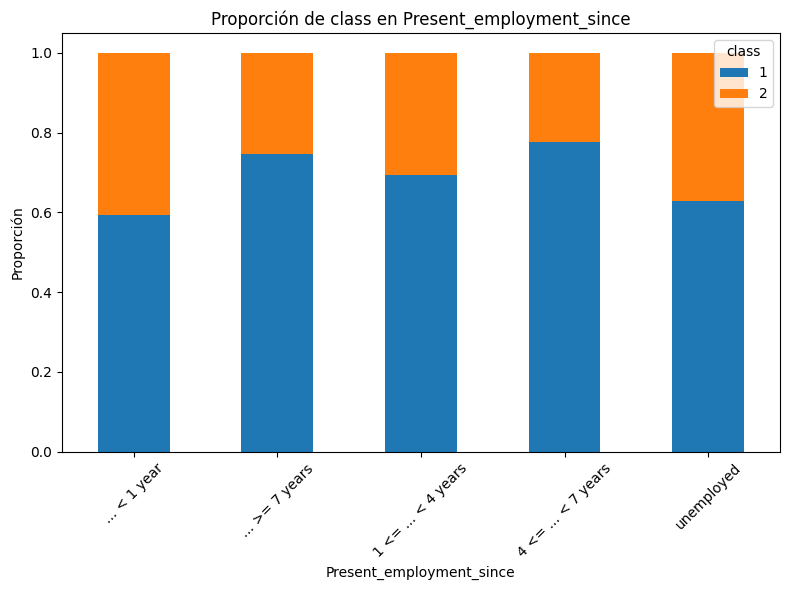

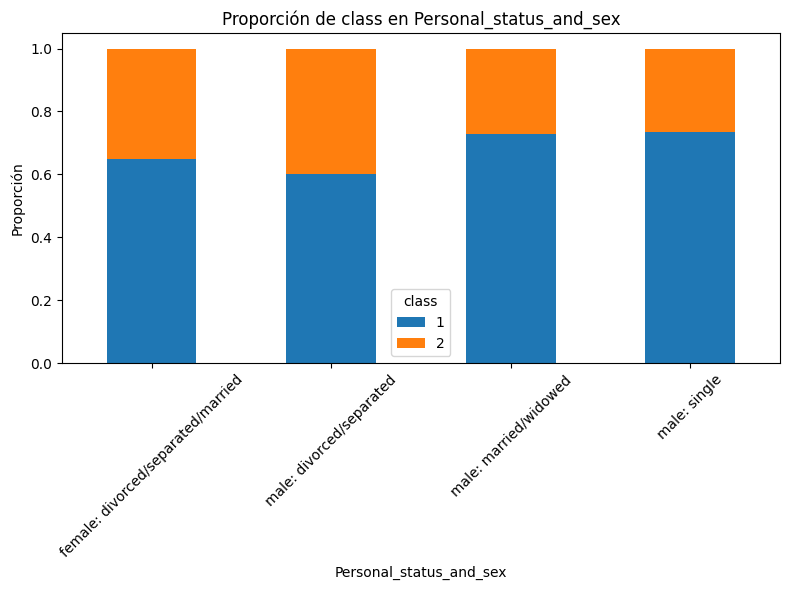

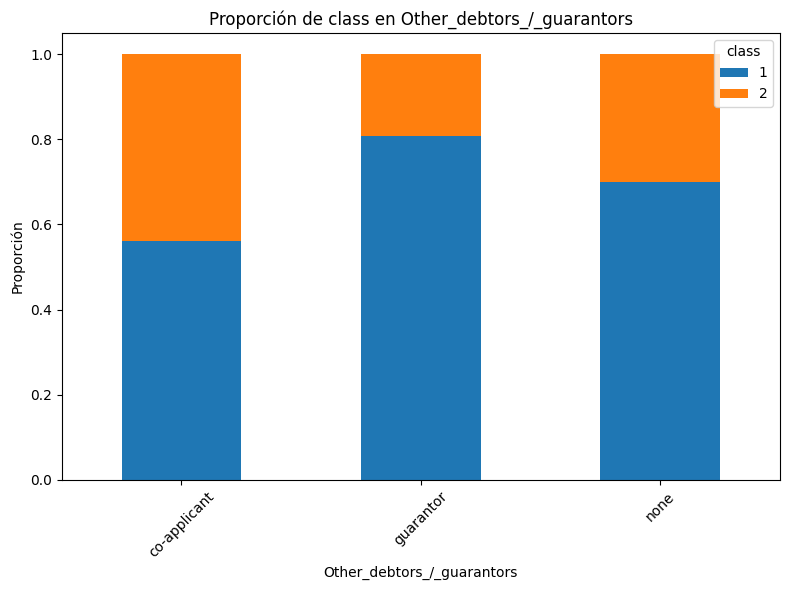

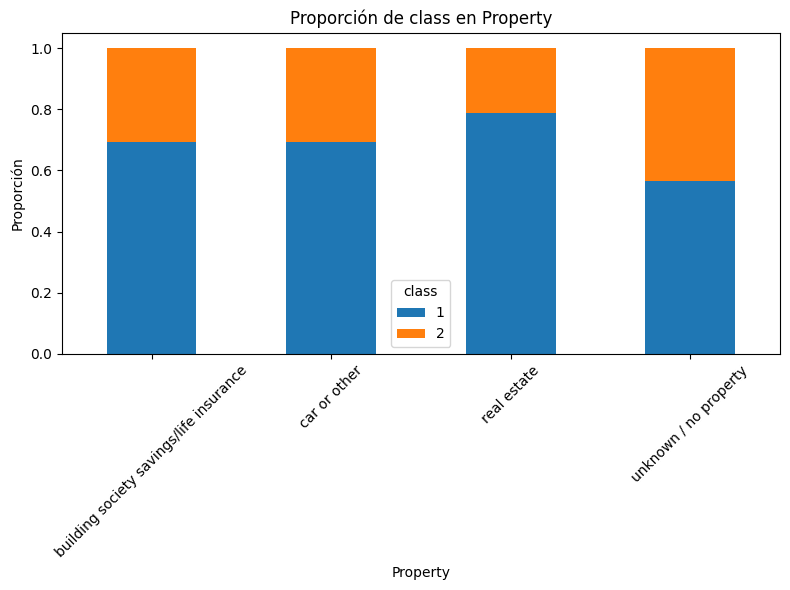

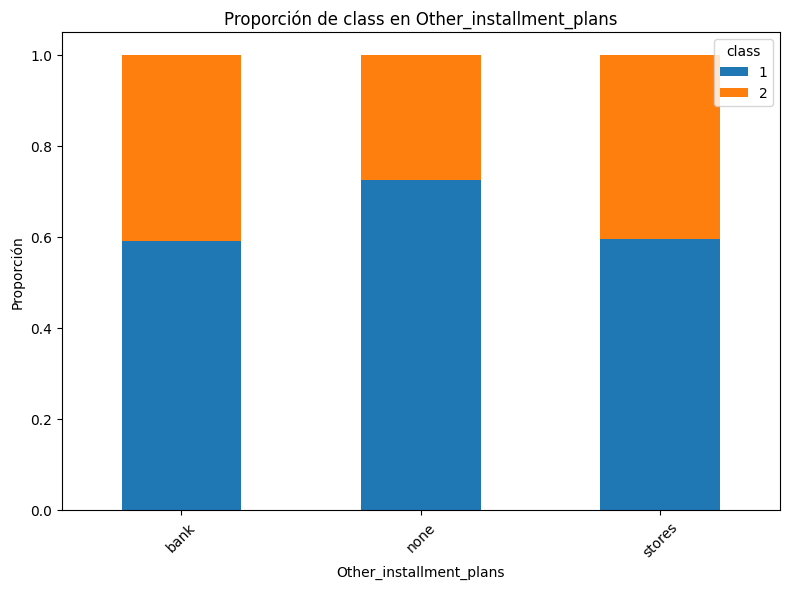

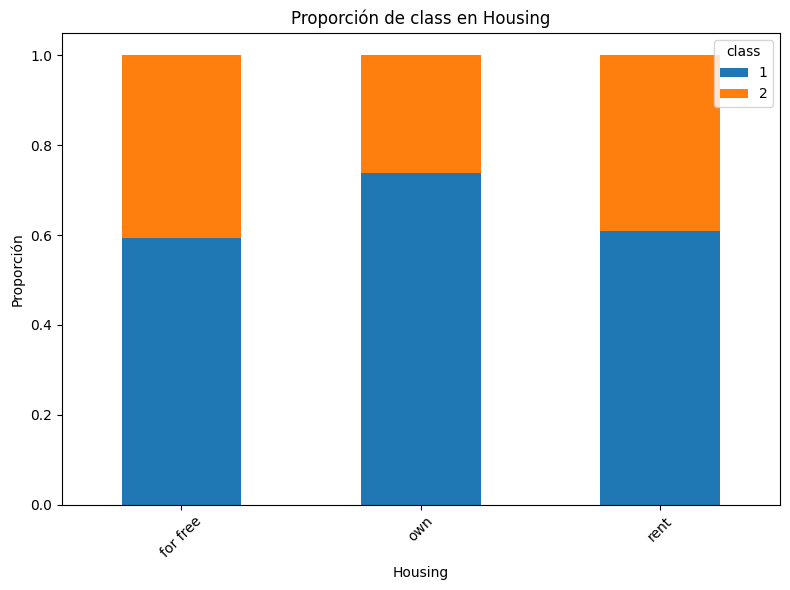

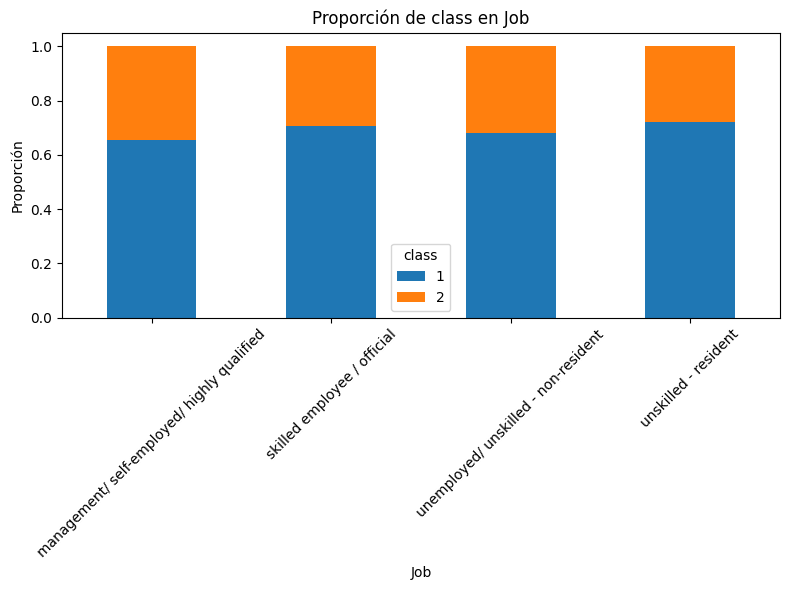

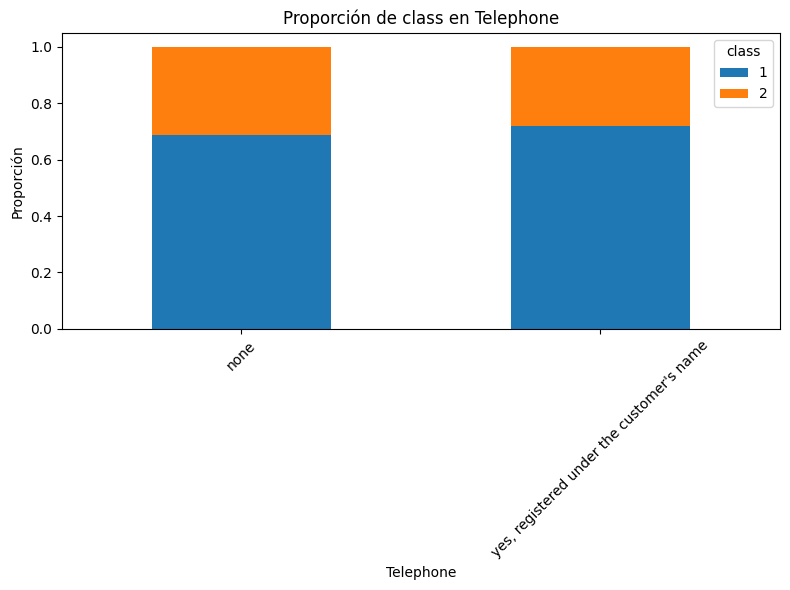

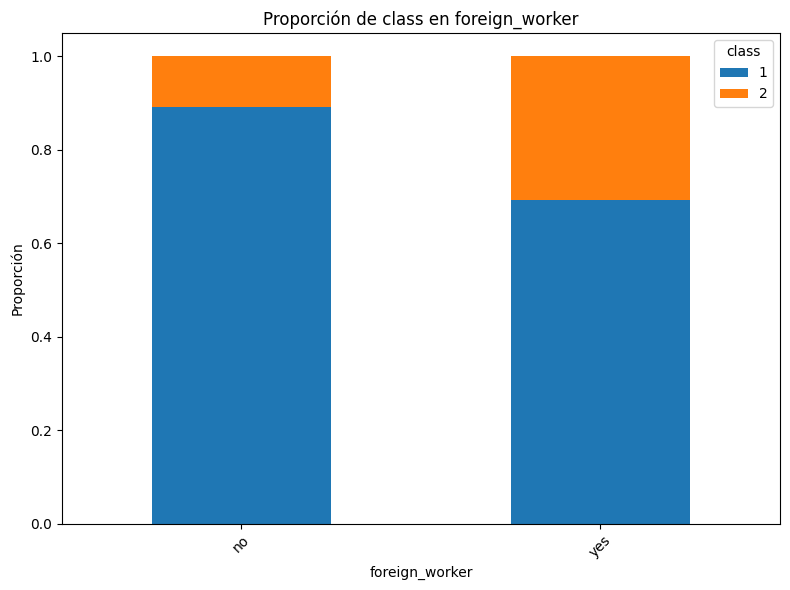

In [7]:
figsize = (8,6)

def visualize_categorical_vs_target(df, categorical_cols, target_col):
    """
    Visualiza variables categóricas en relación con la variable objetivo utilizando gráficos de barras agrupadas.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - categorical_cols: Lista de nombres de columnas categóricas.
    - target_col: Nombre de la columna objetivo.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in categorical_cols:
        plt.figure(figsize=figsize)
        order = df[col].value_counts().index
        sns.countplot(x=col, data=df, hue=target_col, order=order)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(col)
        plt.ylabel('Frecuencia')
        plt.xticks(rotation=45)
        plt.legend(title=target_col)
        plt.tight_layout()
        plt.show()

def visualize_categorical_vs_target_stacked(df, categorical_cols, target_col):
    import matplotlib.pyplot as plt
    import pandas as pd

    for col in categorical_cols:
        ct = pd.crosstab(df[col], df[target_col], normalize='index')
        ct.plot(kind='bar', stacked=True, figsize=figsize)
        plt.title(f'Proporción de {target_col} en {col}')
        plt.xlabel(col)
        plt.ylabel('Proporción')
        plt.legend(title=target_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


def visualize_numeric_vs_target(df, numerical_cols, target_col):
    """
    Visualiza variables numéricas en relación con la variable objetivo utilizando diagramas de caja.

    Parámetros:
    - df: DataFrame que contiene los datos.
    - numerical_cols: Lista de nombres de columnas numéricas.
    - target_col: Nombre de la columna objetivo.
    """
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in numerical_cols:
        plt.figure(figsize=figsize)
        sns.boxplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)
        plt.show()

def visualize_numeric_vs_target_violin(df, numerical_cols, target_col):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in numerical_cols:
        plt.figure(figsize=figsize)
        sns.violinplot(x=target_col, y=col, data=df)
        plt.title(f'{col} vs {target_col}')
        plt.xlabel(target_col)
        plt.ylabel(col)
        plt.show()

def visualize_numeric_vs_target_hist(df, numerical_cols, target_col):
    import matplotlib.pyplot as plt
    import seaborn as sns

    for col in numerical_cols:
        plt.figure(figsize=figsize)
        sns.histplot(data=df, x=col, hue=target_col, kde=True, element='step', stat='density', common_norm=False)
        plt.title(f'Distribución de {col} por {target_col}')
        plt.xlabel(col)
        plt.ylabel('Densidad')
        plt.show()



#class: 1 = good , 2 = bad
# Visualizar variables numéricas vs. variable objetivo
#visualize_numeric_vs_target_violin(df, numerical_cols, 'class')
#visualize_numeric_vs_target_hist(df, numerical_cols, 'class')
#visualize_numeric_vs_target(df, numerical_cols, 'class')

# Visualizar variables categóricas vs. variable objetivo
#visualize_categorical_vs_target(df, categorical_cols, 'class')
visualize_categorical_vs_target_stacked(df, categorical_cols, 'class')


Estos gráficos de barras apiladas nos permiten analizar la proporción de la variable objetivo (class) dentro de cada categoría de las variables categóricas. Este tipo de gráfico apilado muestra, para cada categoría, la distribución proporcional de las clases (en este caso, "Good" y "Bad"), permitiendo observar si alguna categoría está más asociada a una de las clases.

En este caso concreto, no parece que ninguna categoría muestre una tendencia claramente dominante hacia una u otra clase de riesgo. Esto sugiere que, al menos a primera vista, ninguna de las categorías se destaca significativamente como indicador del riesgo de un préstamo.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='class'), df['class'], test_size=0.3, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.77

Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.90      0.85       209
           2       0.68      0.46      0.55        91

    accuracy                           0.77       300
   macro avg       0.74      0.68      0.70       300
weighted avg       0.76      0.77      0.76       300



Con estos resultados tenemos un 77% de precisión, que es razonable para un modelo simple como la regresión logística, pero no extremadamente alto. Esto sugiere que el modelo tiene cierto éxito, aunque no perfecto, para separar las clases.
Respecto a la precision y el recall observamos que la clase 1 tiene una precisión y recall más altos (0.79 y 0.90), mientras que la clase 2 tiene métricas mucho menores, en particular, un recall de 0.46. Esto significa que el modelo tiene dificultades para identificar correctamente la clase 2 y la predice menos eficazmente que la clase 1.
Además, el F1-score más bajo de la clase 2 (0.55) también indica que el modelo tiene problemas para capturar adecuadamente los ejemplos de esta clase.
En conclusión, dado que el modelo muestra dificultades para clasificar correctamente una de las dos clases, podríamos concluir que el conjunto de datos presenta cierta complejidad, especialmente en la diferenciación de la clase minoritaria (clase 2).